In [1]:
import sys,os

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from   glob import glob

sys.path.append('../BackendTools')
import ResonanceFitter as fitres
import ResonanceFitResult as fitclass

sys.path.append('../AnalysisScripts')
from plot_VNA_PowerScan import create_dirs,get_input_files,fit_single_file

In [2]:
## Set up matplotlib options for plots
%matplotlib notebook
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 12})
plt.rc('font', family='serif')
dfc = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
## Flag to display plots
show_plots = True
save_plots = False

## Series identifier
day    = '20230404'

## Path to VNA data
dataPath = '/data/ProcessedOutputs/'
dataDir  = 'out_'
fname    = 'ResonanceFits_'

In [4]:
## Find all the files
dir_list  = np.sort(glob( os.path.join(dataPath,dataDir+day+'*') ))
file_list = [ os.path.join(d,"ResonanceFits_"+"_".join(d.split("_")[1:])+".h5") for d in dir_list]
res_names = ["Nb"+str(i) for i in np.arange(len(dir_list))]
    
## Trim the box mode
dir_list  = dir_list[1:]
file_list = file_list[1:]
res_names = res_names[1:]

## Show the list
for i in np.arange(len(dir_list)):
    print(res_names[i],file_list[i])

Nb1 /data/ProcessedOutputs/out_20230404_164559/ResonanceFits_20230404_164559.h5
Nb2 /data/ProcessedOutputs/out_20230404_165052/ResonanceFits_20230404_165052.h5
Nb3 /data/ProcessedOutputs/out_20230404_165539/ResonanceFits_20230404_165539.h5
Nb4 /data/ProcessedOutputs/out_20230404_170059/ResonanceFits_20230404_170059.h5
Nb5 /data/ProcessedOutputs/out_20230404_170600/ResonanceFits_20230404_170600.h5
Nb6 /data/ProcessedOutputs/out_20230404_171036/ResonanceFits_20230404_171036.h5
Nb7 /data/ProcessedOutputs/out_20230404_171547/ResonanceFits_20230404_171547.h5
Nb8 /data/ProcessedOutputs/out_20230404_172024/ResonanceFits_20230404_172024.h5
Nb9 /data/ProcessedOutputs/out_20230404_172457/ResonanceFits_20230404_172457.h5
Nb10 /data/ProcessedOutputs/out_20230404_172938/ResonanceFits_20230404_172938.h5


<IPython.core.display.Javascript object>


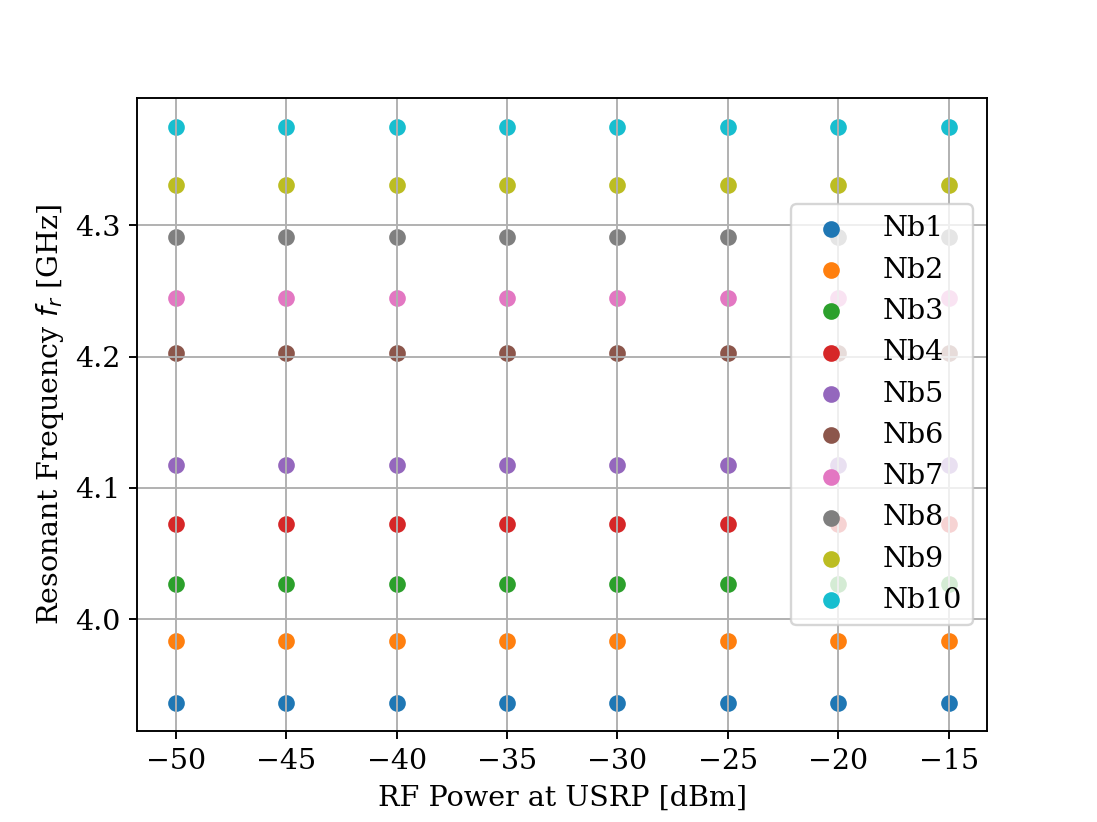

<IPython.core.display.Javascript object>


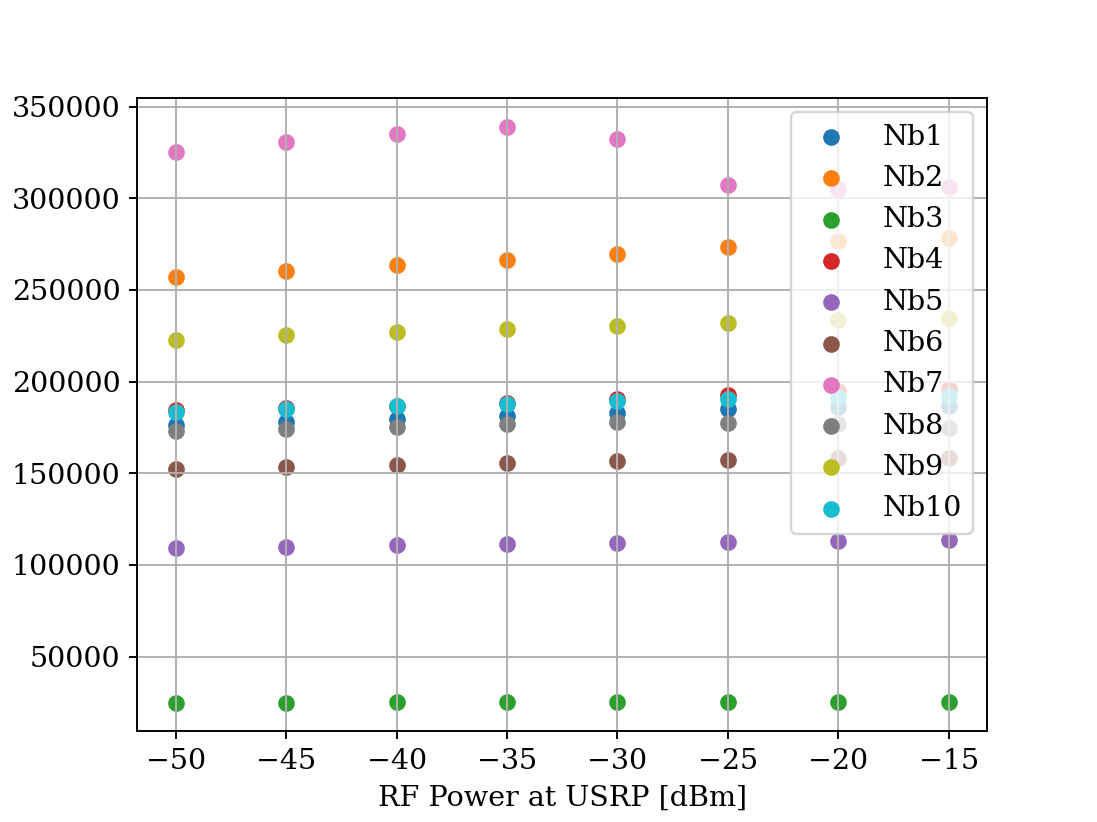

<IPython.core.display.Javascript object>


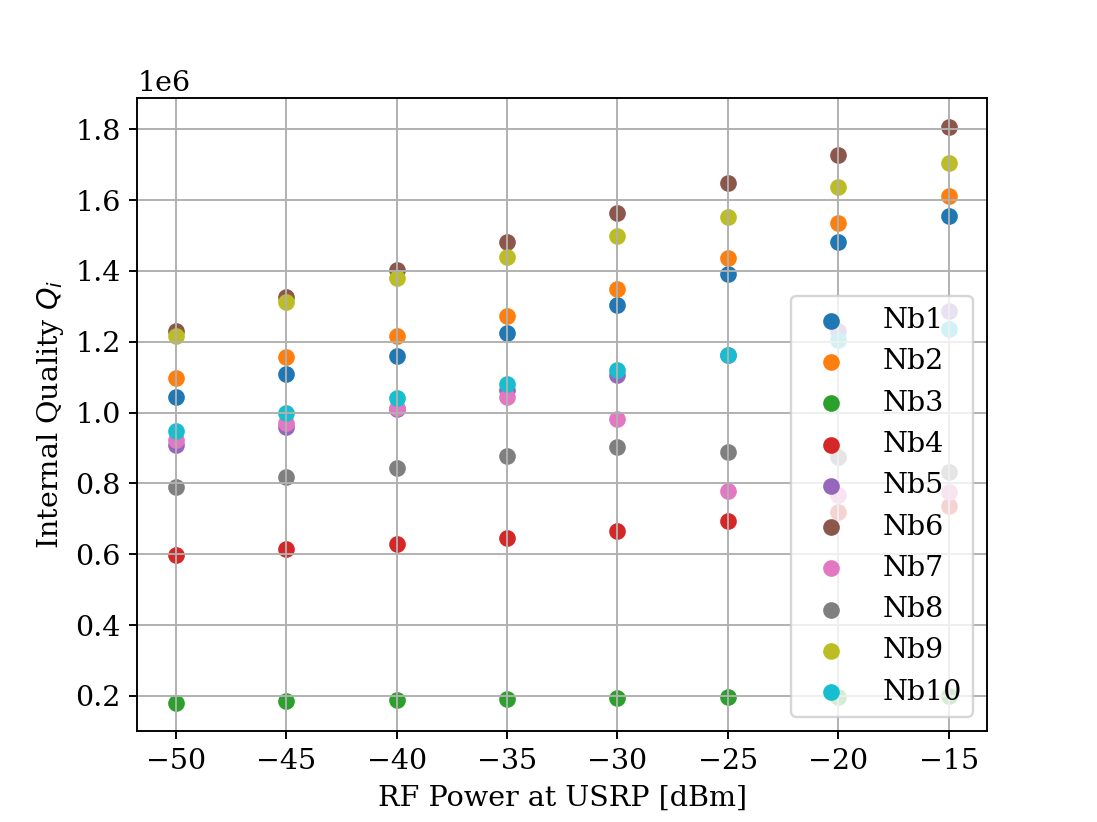

<IPython.core.display.Javascript object>


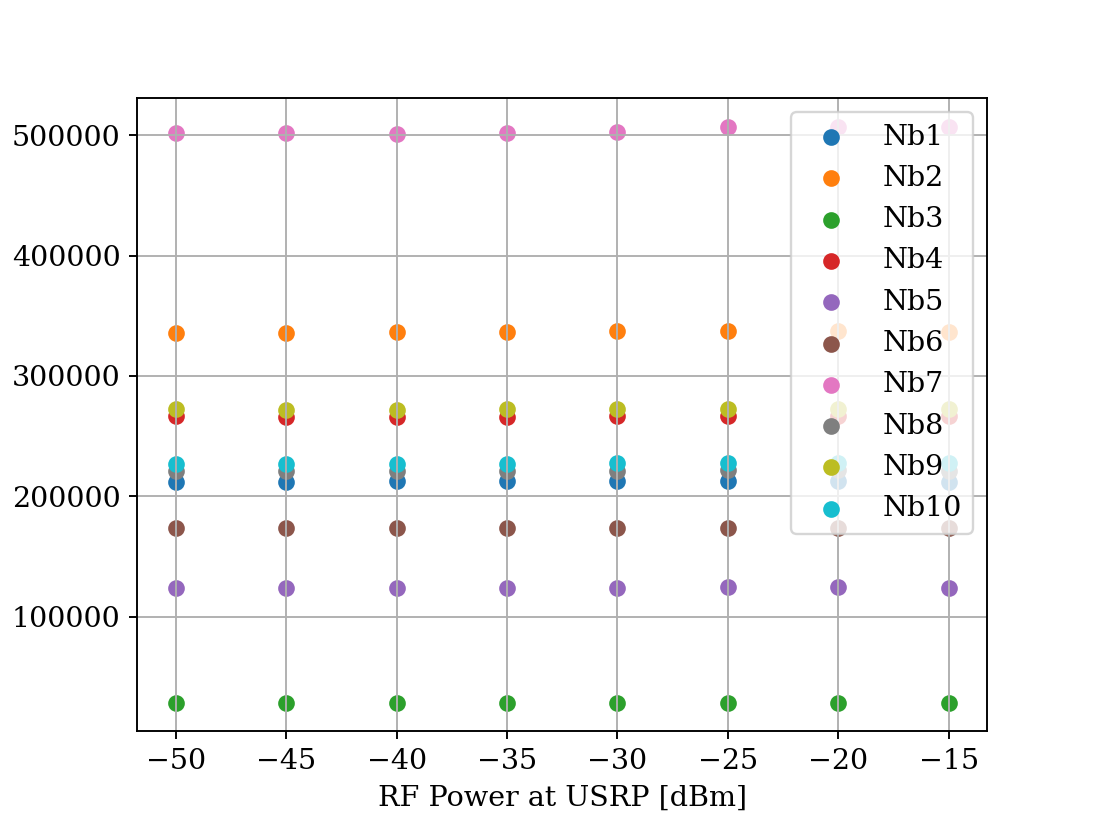

Text(0, 0.5, 'Coupling Quality $Q_c$')

In [5]:
## Create a plot for f_r
ax_fr = plt.figure().gca()
ax_fr.set_xlabel("RF Power at USRP [dBm]")
ax_fr.set_ylabel(r"Resonant Frequency $f_r$ [GHz]")

## Create a plot for Q_r
ax_Qr = plt.figure().gca()
ax_Qr.set_xlabel("RF Power at USRP [dBm]")
ax_Qr.set_ylabel(r"Resonant Quality $Q_r$")

## Create a plot for Q_i
ax_Qi = plt.figure().gca()
ax_Qi.set_xlabel("RF Power at USRP [dBm]")
ax_Qi.set_ylabel(r"Internal Quality $Q_i$")

## Create a plot for Q_i
ax_Qc = plt.figure().gca()
ax_Qc.set_xlabel("RF Power at USRP [dBm]")
ax_Qc.set_ylabel(r"Coupling Quality $Q_c$")

In [6]:
## Populate the plots
for i in np.arange(len(file_list)):
    vna_obj = fitclass.decode_hdf5(file_list[i])
    #vna_obj.show_series_result()
    
    ax_fr.scatter(vna_obj.powers,vna_obj.fit_fr, label=res_names[i])
    ax_Qr.scatter(vna_obj.powers,vna_obj.fit_Qr, label=res_names[i])
    ax_Qi.scatter(vna_obj.powers,vna_obj.fit_Qi, label=res_names[i])
    ax_Qc.scatter(vna_obj.powers,vna_obj.fit_Qc, label=res_names[i])
    
ax_fr.legend(loc='best')
ax_Qr.legend(loc='best')
ax_Qi.legend(loc='best')
ax_Qc.legend(loc='best')

<IPython.core.display.Javascript object>


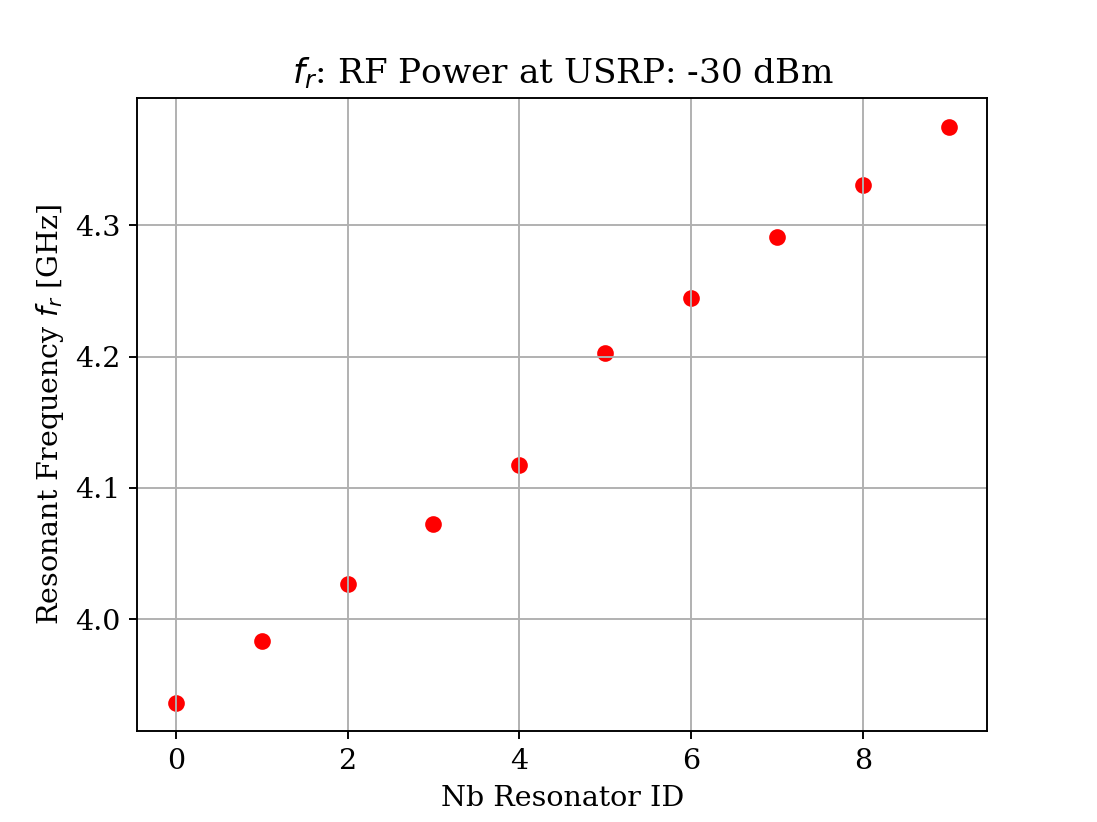

<IPython.core.display.Javascript object>


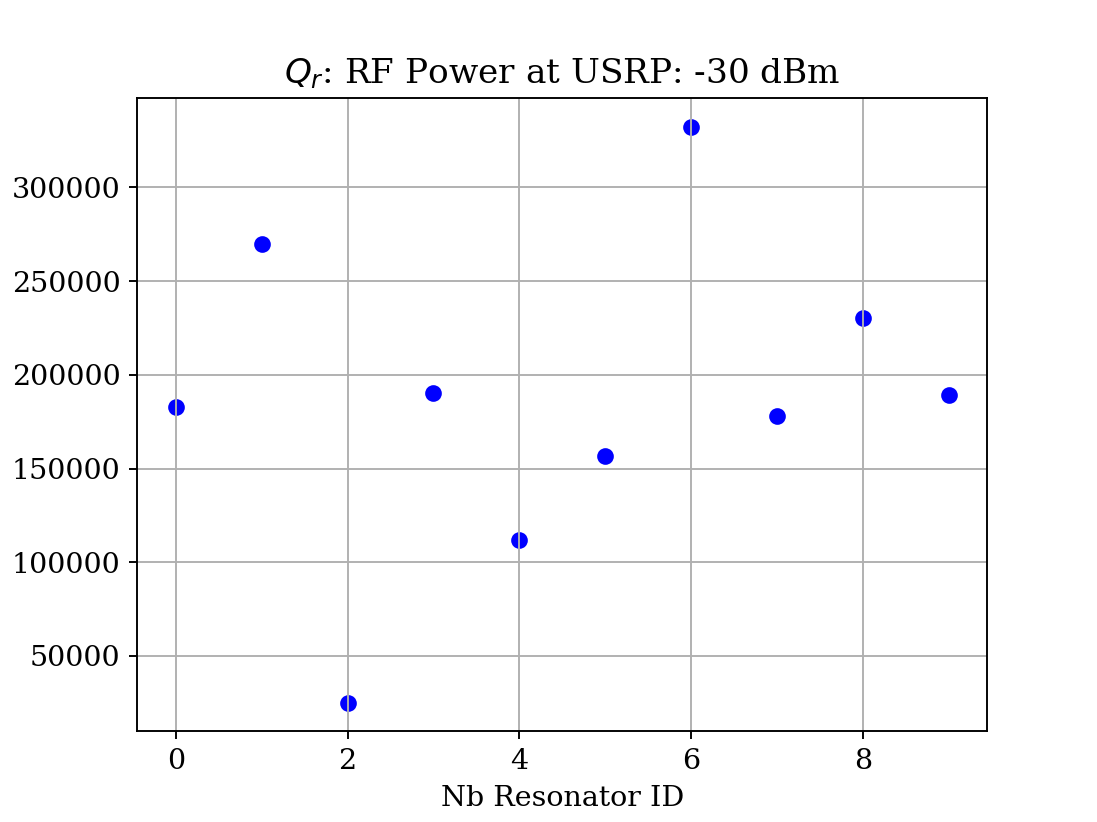

<IPython.core.display.Javascript object>


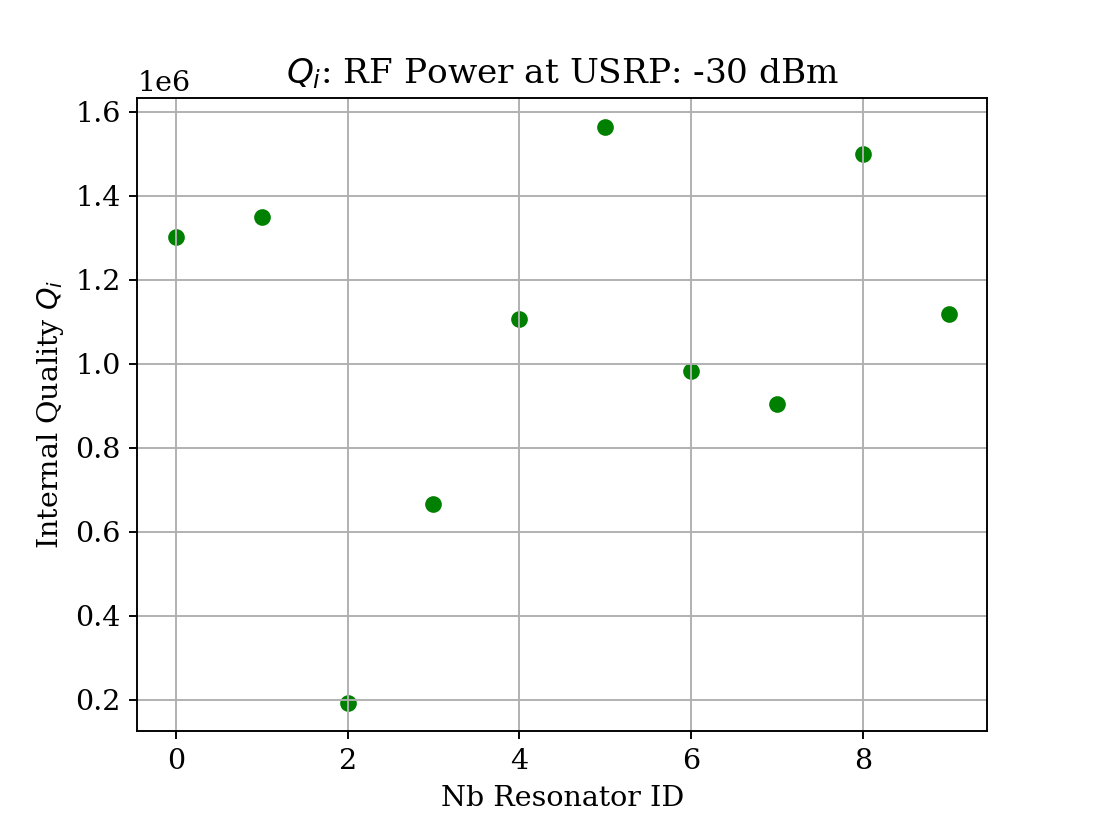

<IPython.core.display.Javascript object>


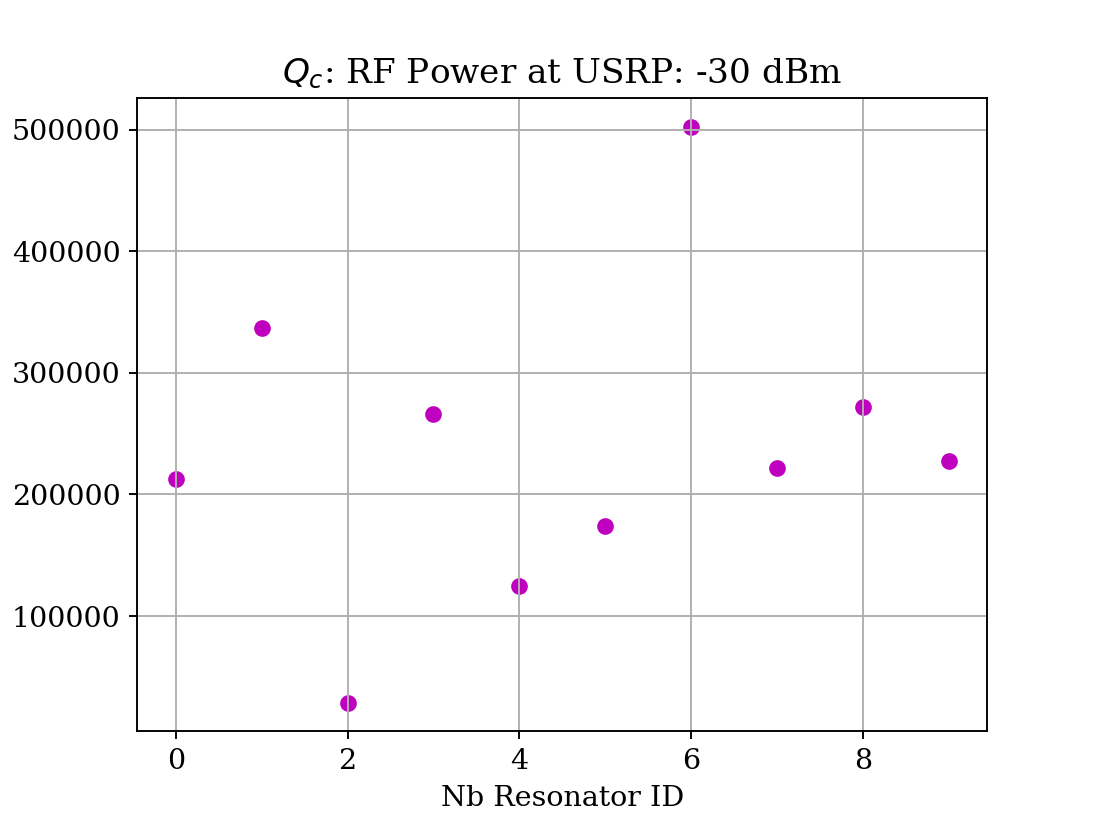

Text(0, 0.5, 'Coupling Quality $Q_c$')

In [7]:
## Create a plot for f_r
ax_fr2 = plt.figure().gca()
ax_fr2.set_xlabel("Nb Resonator ID")
ax_fr2.set_ylabel(r"Resonant Frequency $f_r$ [GHz]")

## Create a plot for Q_r
ax_Qr2 = plt.figure().gca()
ax_Qr2.set_xlabel("Nb Resonator ID")
ax_Qr2.set_ylabel(r"Resonant Quality $Q_r$")

## Create a plot for Q_i
ax_Qi2 = plt.figure().gca()
ax_Qi2.set_xlabel("Nb Resonator ID")
ax_Qi2.set_ylabel(r"Internal Quality $Q_i$")

## Create a plot for Q_i
ax_Qc2 = plt.figure().gca()
ax_Qc2.set_xlabel("Nb Resonator ID")
ax_Qc2.set_ylabel(r"Coupling Quality $Q_c$")

In [8]:
## Power to plot
pwr = -30

## Populate the plots
for i in np.arange(len(file_list)):
    vna_obj = fitclass.decode_hdf5(file_list[i])
    #vna_obj.show_series_result()
    
    pwr_idx = np.argmin(np.abs(vna_obj.powers - pwr))
    
    ax_fr2.scatter(i,vna_obj.fit_fr[pwr_idx], color='r')
    ax_Qr2.scatter(i,vna_obj.fit_Qr[pwr_idx], color='b')
    ax_Qi2.scatter(i,vna_obj.fit_Qi[pwr_idx], color='g')
    ax_Qc2.scatter(i,vna_obj.fit_Qc[pwr_idx], color='m')
    
ax_fr2.set_title(r"$f_r$: RF Power at USRP: "+str(pwr)+" dBm")
ax_Qr2.set_title(r"$Q_r$: RF Power at USRP: "+str(pwr)+" dBm")
ax_Qi2.set_title(r"$Q_i$: RF Power at USRP: "+str(pwr)+" dBm")
ax_Qc2.set_title(r"$Q_c$: RF Power at USRP: "+str(pwr)+" dBm")

Text(0.5, 1.0, '$Q_c$: RF Power at USRP: -30 dBm')